In [247]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [130]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
data = np.c_[X,y]
data_df = pd.DataFrame(data, columns=np.append(boston.feature_names,'Target'))
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


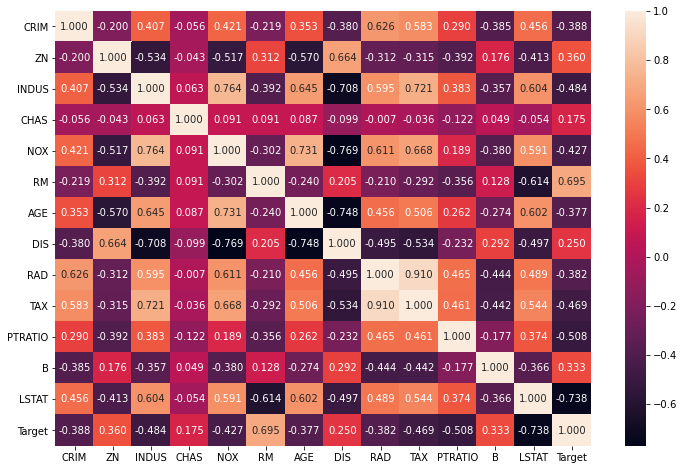

In [131]:
plt.figure(figsize=(12,8))
sns.heatmap(data_df.corr(), annot=True, fmt='.3f')

In [132]:
from sklearn.linear_model import Lasso

In [133]:
regressor = Lasso(random_state=42,alpha=0.1)
regressor

Lasso(alpha=0.1, random_state=42)

In [134]:
regressor.fit(X, y)

Lasso(alpha=0.1, random_state=42)

In [135]:
regressor.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [136]:
feature_coefs = list(map(lambda x: round(x,3), regressor.coef_))
print(feature_coefs)

[-0.098, 0.049, -0.037, 0.955, -0.0, 3.703, -0.01, -1.161, 0.275, -0.015, -0.771, 0.01, -0.569]


In [137]:
pd.DataFrame(feature_coefs, index=boston.feature_names)

,0
CRIM,-0.098
ZN,0.049
INDUS,-0.037
CHAS,0.955
NOX,-0.000
RM,3.703
AGE,-0.010
DIS,-1.161
RAD,0.275
TAX,-0.015


In [138]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = regressor.predict(X)

print('MAE:', mae(y, y_pred))

MAE: 3.3282231192242113


In [156]:
for index, feature in enumerate(boston.feature_names):
    X_new = pd.DataFrame(X[feature])
    regressor.fit(X_new, y)
    y_pred = regressor.predict(X_new)
    print(str(feature) + ":")
    print('\tMAE:', mae(y, y_pred))

CRIM:
	MAE: 6.135107633568537
ZN:
	MAE: 6.06199329897825
INDUS:
	MAE: 5.776137230563014
CHAS:
	MAE: 6.613563606152917
NOX:
	MAE: 5.953393911226992
RM:
	MAE: 4.4568472239168475
AGE:
	MAE: 5.984784569907862
DIS:
	MAE: 6.3650136248312466
RAD:
	MAE: 6.188182414706233
TAX:
	MAE: 5.875875431811647
PTRATIO:
	MAE: 5.7707442350192055
B:
	MAE: 6.20669907433112
LSTAT:
	MAE: 4.504320887620784


In [158]:
features = boston.feature_names
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [163]:
import itertools
list(itertools.combinations(features,2))

[('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NOX', 'PTRATIO'),
 ('NOX', 'B'),
 ('NOX', 'LSTAT'),
 ('RM', 'AGE'),
 ('RM', 'DIS'),
 ('RM', 'RAD'),
 ('RM', 'TAX'),
 ('RM', 'PTRATIO'),
 ('RM', 'B'),
 

In [164]:
comb_features = []
for l in range(1, len(features)):
    comb_features =  comb_features + list(itertools.combinations(features,l))

In [178]:
list(comb_features[0])

['CRIM']

In [179]:
X[list(comb_features[0])]

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [181]:
list_mae = []
for index, feature in enumerate(comb_features):
    X_new = X[list(feature)]
    regressor.fit(X_new, y)
    y_pred = regressor.predict(X_new)
    print(str(feature) + ":")
    mae_new = mae(y,y_pred)
    list_mae.append(mae_new)
    print('\tMAE:', mae_new)

('CRIM',):
	MAE: 6.135107633568537
('ZN',):
	MAE: 6.06199329897825
('INDUS',):
	MAE: 5.776137230563014
('CHAS',):
	MAE: 6.613563606152917
('NOX',):
	MAE: 5.953393911226992
('RM',):
	MAE: 4.4568472239168475
('AGE',):
	MAE: 5.984784569907862
('DIS',):
	MAE: 6.3650136248312466
('RAD',):
	MAE: 6.188182414706233
('TAX',):
	MAE: 5.875875431811647
('PTRATIO',):
	MAE: 5.7707442350192055
('B',):
	MAE: 6.20669907433112
('LSTAT',):
	MAE: 4.504320887620784
('CRIM', 'ZN'):
	MAE: 5.650229960356955
('CRIM', 'INDUS'):
	MAE: 5.544994750019031
('CRIM', 'CHAS'):
	MAE: 6.091065560398266
('CRIM', 'NOX'):
	MAE: 5.779159733566461
('CRIM', 'RM'):
	MAE: 4.204775139527016
('CRIM', 'AGE'):
	MAE: 5.773617595615649
('CRIM', 'DIS'):
	MAE: 6.040151336440427
('CRIM', 'RAD'):
	MAE: 6.0106056586765115
('CRIM', 'TAX'):
	MAE: 5.789897825226647
('CRIM', 'PTRATIO'):
	MAE: 5.391392013282846
('CRIM', 'B'):
	MAE: 5.9685529669584785
('CRIM', 'LSTAT'):
	MAE: 4.482639774882292
('ZN', 'INDUS'):
	MAE: 5.643665254368529
('ZN', 'CHA

('ZN', 'TAX', 'LSTAT'):
	MAE: 4.383140460691299
('ZN', 'PTRATIO', 'B'):
	MAE: 5.252846727996824
('ZN', 'PTRATIO', 'LSTAT'):
	MAE: 4.091570198554174
('ZN', 'B', 'LSTAT'):
	MAE: 4.426490625961786
('INDUS', 'CHAS', 'NOX'):
	MAE: 5.725135567415357
('INDUS', 'CHAS', 'RM'):
	MAE: 4.208099501579307
('INDUS', 'CHAS', 'AGE'):
	MAE: 5.613286253823061
('INDUS', 'CHAS', 'DIS'):
	MAE: 5.736710572065933
('INDUS', 'CHAS', 'RAD'):
	MAE: 5.611355265927808
('INDUS', 'CHAS', 'TAX'):
	MAE: 5.538953598738872
('INDUS', 'CHAS', 'PTRATIO'):
	MAE: 5.239040443521342
('INDUS', 'CHAS', 'B'):
	MAE: 5.549735516825262
('INDUS', 'CHAS', 'LSTAT'):
	MAE: 4.354681838940761
('INDUS', 'NOX', 'RM'):
	MAE: 4.247429374646118
('INDUS', 'NOX', 'AGE'):
	MAE: 5.6917262117373415
('INDUS', 'NOX', 'DIS'):
	MAE: 5.76328214712968
('INDUS', 'NOX', 'RAD'):
	MAE: 5.685462060426383
('INDUS', 'NOX', 'TAX'):
	MAE: 5.599613563208339
('INDUS', 'NOX', 'PTRATIO'):
	MAE: 5.260052054824519
('INDUS', 'NOX', 'B'):
	MAE: 5.585246864504638
('INDUS',

('CRIM', 'ZN', 'NOX', 'TAX'):
	MAE: 5.46083521414077
('CRIM', 'ZN', 'NOX', 'PTRATIO'):
	MAE: 5.100502077079353
('CRIM', 'ZN', 'NOX', 'B'):
	MAE: 5.489312896032191
('CRIM', 'ZN', 'NOX', 'LSTAT'):
	MAE: 4.424701497190812
('CRIM', 'ZN', 'RM', 'AGE'):
	MAE: 3.9907848616141943
('CRIM', 'ZN', 'RM', 'DIS'):
	MAE: 4.164706591594747
('CRIM', 'ZN', 'RM', 'RAD'):
	MAE: 4.062738106189682
('CRIM', 'ZN', 'RM', 'TAX'):
	MAE: 3.966938308895606
('CRIM', 'ZN', 'RM', 'PTRATIO'):
	MAE: 3.895306474838514
('CRIM', 'ZN', 'RM', 'B'):
	MAE: 3.992821535562917
('CRIM', 'ZN', 'RM', 'LSTAT'):
	MAE: 3.891488627758018
('CRIM', 'ZN', 'AGE', 'DIS'):
	MAE: 5.3714984399388355
('CRIM', 'ZN', 'AGE', 'RAD'):
	MAE: 5.524412181817892
('CRIM', 'ZN', 'AGE', 'TAX'):
	MAE: 5.435708069939883
('CRIM', 'ZN', 'AGE', 'PTRATIO'):
	MAE: 5.082219472451494
('CRIM', 'ZN', 'AGE', 'B'):
	MAE: 5.439493825408396
('CRIM', 'ZN', 'AGE', 'LSTAT'):
	MAE: 4.405991539389051
('CRIM', 'ZN', 'DIS', 'RAD'):
	MAE: 5.59775776998984
('CRIM', 'ZN', 'DIS', '

('CRIM', 'RM', 'TAX', 'B'):
	MAE: 3.916212757715312
('CRIM', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.8453053979662557
('CRIM', 'RM', 'PTRATIO', 'B'):
	MAE: 3.753163989169811
('CRIM', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6161762860317204
('CRIM', 'RM', 'B', 'LSTAT'):
	MAE: 3.8413347654195005
('CRIM', 'AGE', 'DIS', 'RAD'):
	MAE: 5.715373137328943
('CRIM', 'AGE', 'DIS', 'TAX'):
	MAE: 5.588832135100101
('CRIM', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 5.117564619126972
('CRIM', 'AGE', 'DIS', 'B'):
	MAE: 5.655033422990126
('CRIM', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.456979836651256
('CRIM', 'AGE', 'RAD', 'TAX'):
	MAE: 5.498273373596583
('CRIM', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.133416198137535
('CRIM', 'AGE', 'RAD', 'B'):
	MAE: 5.666015027135648
('CRIM', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.4882061171042205
('CRIM', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.102110560390034
('CRIM', 'AGE', 'TAX', 'B'):
	MAE: 5.575860488460184
('CRIM', 'AGE', 'TAX', 'LSTAT'):
	MAE: 4.42072368098143
('CRIM', 'AGE', 'PTRATIO', 'B'):
	MAE: 5.009104

('ZN', 'RM', 'AGE', 'TAX'):
	MAE: 3.962250444892395
('ZN', 'RM', 'AGE', 'PTRATIO'):
	MAE: 3.819388783924737
('ZN', 'RM', 'AGE', 'B'):
	MAE: 3.9334374918889714
('ZN', 'RM', 'AGE', 'LSTAT'):
	MAE: 3.9699435733369666
('ZN', 'RM', 'DIS', 'RAD'):
	MAE: 4.141083019473996
('ZN', 'RM', 'DIS', 'TAX'):
	MAE: 3.986934069232807
('ZN', 'RM', 'DIS', 'PTRATIO'):
	MAE: 4.100258916167071
('ZN', 'RM', 'DIS', 'B'):
	MAE: 4.079706498158042
('ZN', 'RM', 'DIS', 'LSTAT'):
	MAE: 3.847628632964009
('ZN', 'RM', 'RAD', 'TAX'):
	MAE: 4.016163120865881
('ZN', 'RM', 'RAD', 'PTRATIO'):
	MAE: 3.955757186521726
('ZN', 'RM', 'RAD', 'B'):
	MAE: 3.9739815588532887
('ZN', 'RM', 'RAD', 'LSTAT'):
	MAE: 3.9055127067732194
('ZN', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.8426486659523476
('ZN', 'RM', 'TAX', 'B'):
	MAE: 3.8927950661559514
('ZN', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.847587957832664
('ZN', 'RM', 'PTRATIO', 'B'):
	MAE: 3.7884722665869996
('ZN', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6598358728239497
('ZN', 'RM', 'B', 'LSTAT'):
	MAE

('INDUS', 'DIS', 'RAD', 'B'):
	MAE: 5.5409349731236635
('INDUS', 'DIS', 'RAD', 'LSTAT'):
	MAE: 4.280842478170907
('INDUS', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 5.189881602331989
('INDUS', 'DIS', 'TAX', 'B'):
	MAE: 5.478146623775104
('INDUS', 'DIS', 'TAX', 'LSTAT'):
	MAE: 4.245764063625323
('INDUS', 'DIS', 'PTRATIO', 'B'):
	MAE: 5.125739959520356
('INDUS', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.90883814979759
('INDUS', 'DIS', 'B', 'LSTAT'):
	MAE: 4.264084472718786
('INDUS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 5.170060203109549
('INDUS', 'RAD', 'TAX', 'B'):
	MAE: 5.458460020934214
('INDUS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.37758456078172
('INDUS', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.126704764432594
('INDUS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 4.107212377890128
('INDUS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.454353092404642
('INDUS', 'TAX', 'PTRATIO', 'B'):
	MAE: 5.107482402749438
('INDUS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 4.08987128395461
('INDUS', 'TAX', 'B', 'LSTAT'):
	MAE: 4.416100628382902
('INDUS', 'PTRATIO

('RM', 'AGE', 'DIS', 'LSTAT'):
	MAE: 3.8976251024373765
('RM', 'AGE', 'RAD', 'TAX'):
	MAE: 3.9651790370179825
('RM', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 3.7744421268840345
('RM', 'AGE', 'RAD', 'B'):
	MAE: 3.89491258074118
('RM', 'AGE', 'RAD', 'LSTAT'):
	MAE: 3.9323305745188137
('RM', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 3.7379844173280516
('RM', 'AGE', 'TAX', 'B'):
	MAE: 3.8578259722714505
('RM', 'AGE', 'TAX', 'LSTAT'):
	MAE: 3.866107119495049
('RM', 'AGE', 'PTRATIO', 'B'):
	MAE: 3.6161701089787757
('RM', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 3.658892101348361
('RM', 'AGE', 'B', 'LSTAT'):
	MAE: 3.880987521636685
('RM', 'DIS', 'RAD', 'TAX'):
	MAE: 4.040016187812667
('RM', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 3.9770272555900315
('RM', 'DIS', 'RAD', 'B'):
	MAE: 4.00531169235621
('RM', 'DIS', 'RAD', 'LSTAT'):
	MAE: 3.847777796398699
('RM', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 3.8526056884652085
('RM', 'DIS', 'TAX', 'B'):
	MAE: 3.922619857521199
('RM', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.7572567193747517
('RM', 'DIS'

('CRIM', 'ZN', 'NOX', 'DIS', 'TAX'):
	MAE: 5.345939495311356
('CRIM', 'ZN', 'NOX', 'DIS', 'PTRATIO'):
	MAE: 5.001022411071911
('CRIM', 'ZN', 'NOX', 'DIS', 'B'):
	MAE: 5.288645726328506
('CRIM', 'ZN', 'NOX', 'DIS', 'LSTAT'):
	MAE: 4.240603714804202
('CRIM', 'ZN', 'NOX', 'RAD', 'TAX'):
	MAE: 5.308314067579196
('CRIM', 'ZN', 'NOX', 'RAD', 'PTRATIO'):
	MAE: 5.081640494113634
('CRIM', 'ZN', 'NOX', 'RAD', 'B'):
	MAE: 5.484558184178601
('CRIM', 'ZN', 'NOX', 'RAD', 'LSTAT'):
	MAE: 4.430742059524885
('CRIM', 'ZN', 'NOX', 'TAX', 'PTRATIO'):
	MAE: 5.11317577529695
('CRIM', 'ZN', 'NOX', 'TAX', 'B'):
	MAE: 5.3937728268969485
('CRIM', 'ZN', 'NOX', 'TAX', 'LSTAT'):
	MAE: 4.383689779660057
('CRIM', 'ZN', 'NOX', 'PTRATIO', 'B'):
	MAE: 5.019002201968744
('CRIM', 'ZN', 'NOX', 'PTRATIO', 'LSTAT'):
	MAE: 4.085281670350605
('CRIM', 'ZN', 'NOX', 'B', 'LSTAT'):
	MAE: 4.409325176842417
('CRIM', 'ZN', 'RM', 'AGE', 'DIS'):
	MAE: 3.836391669809902
('CRIM', 'ZN', 'RM', 'AGE', 'RAD'):
	MAE: 3.9598250754977413
('CRI

('CRIM', 'INDUS', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6158127112530276
('CRIM', 'INDUS', 'RM', 'B', 'LSTAT'):
	MAE: 3.8351418909388366
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD'):
	MAE: 5.321605151560094
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX'):
	MAE: 5.299946838642357
('CRIM', 'INDUS', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 4.910724215101846
('CRIM', 'INDUS', 'AGE', 'DIS', 'B'):
	MAE: 5.221277235840462
('CRIM', 'INDUS', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.262097093498086
('CRIM', 'INDUS', 'AGE', 'RAD', 'TAX'):
	MAE: 5.405946233961992
('CRIM', 'INDUS', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.028743601949761
('CRIM', 'INDUS', 'AGE', 'RAD', 'B'):
	MAE: 5.413071995348033
('CRIM', 'INDUS', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.411926939210731
('CRIM', 'INDUS', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.027408363500401
('CRIM', 'INDUS', 'AGE', 'TAX', 'B'):
	MAE: 5.406816888505719
('CRIM', 'INDUS', 'AGE', 'TAX', 'LSTAT'):
	MAE: 4.39028181631979
('CRIM', 'INDUS', 'AGE', 'PTRATIO', 'B'):
	MAE: 4.955815816954086
('CRIM', 'INDUS', 'AG

('CRIM', 'NOX', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.456979715837636
('CRIM', 'NOX', 'AGE', 'RAD', 'TAX'):
	MAE: 5.498274105791063
('CRIM', 'NOX', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.066418753071246
('CRIM', 'NOX', 'AGE', 'RAD', 'B'):
	MAE: 5.666014902418524
('CRIM', 'NOX', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.488205992243076
('CRIM', 'NOX', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.102112172134585
('CRIM', 'NOX', 'AGE', 'TAX', 'B'):
	MAE: 5.575860392953071
('CRIM', 'NOX', 'AGE', 'TAX', 'LSTAT'):
	MAE: 4.420723583232653
('CRIM', 'NOX', 'AGE', 'PTRATIO', 'B'):
	MAE: 5.000571719204931
('CRIM', 'NOX', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 4.03666337768638
('CRIM', 'NOX', 'AGE', 'B', 'LSTAT'):
	MAE: 4.473662725629809
('CRIM', 'NOX', 'DIS', 'RAD', 'TAX'):
	MAE: 5.605927269483828
('CRIM', 'NOX', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 5.040812569270178
('CRIM', 'NOX', 'DIS', 'RAD', 'B'):
	MAE: 5.711722689709395
('CRIM', 'NOX', 'DIS', 'RAD', 'LSTAT'):
	MAE: 4.436488788739461
('CRIM', 'NOX', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 5

('ZN', 'INDUS', 'NOX', 'RAD', 'PTRATIO'):
	MAE: 5.2384538241062515
('ZN', 'INDUS', 'NOX', 'RAD', 'B'):
	MAE: 5.415612793511991
('ZN', 'INDUS', 'NOX', 'RAD', 'LSTAT'):
	MAE: 4.427241639185736
('ZN', 'INDUS', 'NOX', 'TAX', 'PTRATIO'):
	MAE: 5.152898722331809
('ZN', 'INDUS', 'NOX', 'TAX', 'B'):
	MAE: 5.355412712297752
('ZN', 'INDUS', 'NOX', 'TAX', 'LSTAT'):
	MAE: 4.38961885713513
('ZN', 'INDUS', 'NOX', 'PTRATIO', 'B'):
	MAE: 5.097131560875851
('ZN', 'INDUS', 'NOX', 'PTRATIO', 'LSTAT'):
	MAE: 4.0915680822240486
('ZN', 'INDUS', 'NOX', 'B', 'LSTAT'):
	MAE: 4.41823629794872
('ZN', 'INDUS', 'RM', 'AGE', 'DIS'):
	MAE: 3.946017236000891
('ZN', 'INDUS', 'RM', 'AGE', 'RAD'):
	MAE: 4.026337767690588
('ZN', 'INDUS', 'RM', 'AGE', 'TAX'):
	MAE: 3.9622498471577225
('ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO'):
	MAE: 3.8146602329612715
('ZN', 'INDUS', 'RM', 'AGE', 'B'):
	MAE: 3.9554696159037737
('ZN', 'INDUS', 'RM', 'AGE', 'LSTAT'):
	MAE: 3.956389858808335
('ZN', 'INDUS', 'RM', 'DIS', 'RAD'):
	MAE: 4.06006760

('ZN', 'NOX', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.8426467200013095
('ZN', 'NOX', 'RM', 'TAX', 'B'):
	MAE: 3.892793423889078
('ZN', 'NOX', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.847588212987838
('ZN', 'NOX', 'RM', 'PTRATIO', 'B'):
	MAE: 3.756454059278703
('ZN', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6598279955600166
('ZN', 'NOX', 'RM', 'B', 'LSTAT'):
	MAE: 3.8497934846504753
('ZN', 'NOX', 'AGE', 'DIS', 'RAD'):
	MAE: 5.482904732642107
('ZN', 'NOX', 'AGE', 'DIS', 'TAX'):
	MAE: 5.2791386480712275
('ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 5.0265468752583065
('ZN', 'NOX', 'AGE', 'DIS', 'B'):
	MAE: 5.317271913708667
('ZN', 'NOX', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.294734757685158
('ZN', 'NOX', 'AGE', 'RAD', 'TAX'):
	MAE: 5.425761567755224
('ZN', 'NOX', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.188992560940925
('ZN', 'NOX', 'AGE', 'RAD', 'B'):
	MAE: 5.527662998397918
('ZN', 'NOX', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.411430295316036
('ZN', 'NOX', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.1420017237842375
('ZN', 'NOX', 'A

('INDUS', 'CHAS', 'AGE', 'DIS', 'B'):
	MAE: 5.328735614339344
('INDUS', 'CHAS', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.226300263572379
('INDUS', 'CHAS', 'AGE', 'RAD', 'TAX'):
	MAE: 5.449879669075674
('INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.12082231748028
('INDUS', 'CHAS', 'AGE', 'RAD', 'B'):
	MAE: 5.44229425009674
('INDUS', 'CHAS', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.328223157402099
('INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.057564965062566
('INDUS', 'CHAS', 'AGE', 'TAX', 'B'):
	MAE: 5.397135648991155
('INDUS', 'CHAS', 'AGE', 'TAX', 'LSTAT'):
	MAE: 4.304406125541317
('INDUS', 'CHAS', 'AGE', 'PTRATIO', 'B'):
	MAE: 4.990462752571438
('INDUS', 'CHAS', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 3.989063802615028
('INDUS', 'CHAS', 'AGE', 'B', 'LSTAT'):
	MAE: 4.314405601640944
('INDUS', 'CHAS', 'DIS', 'RAD', 'TAX'):
	MAE: 5.518749020691732
('INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 5.233099933267983
('INDUS', 'CHAS', 'DIS', 'RAD', 'B'):
	MAE: 5.504848758739395
('INDUS', 'CHAS', 'DIS',

	MAE: 3.8927299922366743
('CHAS', 'NOX', 'RM', 'AGE', 'LSTAT'):
	MAE: 3.9201025845645816
('CHAS', 'NOX', 'RM', 'DIS', 'RAD'):
	MAE: 4.114227329371333
('CHAS', 'NOX', 'RM', 'DIS', 'TAX'):
	MAE: 4.010054851787339
('CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'):
	MAE: 3.841811696799415
('CHAS', 'NOX', 'RM', 'DIS', 'B'):
	MAE: 4.031639297899451
('CHAS', 'NOX', 'RM', 'DIS', 'LSTAT'):
	MAE: 3.8824458151965935
('CHAS', 'NOX', 'RM', 'RAD', 'TAX'):
	MAE: 4.01036891578254
('CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO'):
	MAE: 3.8688238809264837
('CHAS', 'NOX', 'RM', 'RAD', 'B'):
	MAE: 3.971962370609904
('CHAS', 'NOX', 'RM', 'RAD', 'LSTAT'):
	MAE: 3.860524449841149
('CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.828046807364403
('CHAS', 'NOX', 'RM', 'TAX', 'B'):
	MAE: 3.8948007970111407
('CHAS', 'NOX', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.8027430712147607
('CHAS', 'NOX', 'RM', 'PTRATIO', 'B'):
	MAE: 3.712061922109306
('CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6134448326856417
('CHAS', 'NOX', 'RM', 'B', 'LSTAT

('NOX', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 4.986783166477621
('NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.96958582784088
('NOX', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 4.455283799671993
('NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 5.164480039945845
('NOX', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 5.504672185586564
('NOX', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.333696229849016
('NOX', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.070066290520451
('NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 4.0445958447458725
('NOX', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 4.472489087723463
('NOX', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 5.0938722392801425
('NOX', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 4.034879767987411
('NOX', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 4.401650668944771
('NOX', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 4.005959430692141
('NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 5.135753325262379
('NOX', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 5.651454637324872
('NOX', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.252

('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'LSTAT'):
	MAE: 3.9093537660939663
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD'):
	MAE: 3.9903436940970822
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'TAX'):
	MAE: 3.8918395594997706
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'PTRATIO'):
	MAE: 3.8468251988454907
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'B'):
	MAE: 3.884766529982801
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'LSTAT'):
	MAE: 3.7117495518166277
('CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'TAX'):
	MAE: 3.9444829458495834
('CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'PTRATIO'):
	MAE: 3.826969246661548
('CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'B'):
	MAE: 3.943355732981902
('CRIM', 'ZN', 'INDUS', 'RM', 'RAD', 'LSTAT'):
	MAE: 3.8834612551590864
('CRIM', 'ZN', 'INDUS', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.7779946651403997
('CRIM', 'ZN', 'INDUS', 'RM', 'TAX', 'B'):
	MAE: 3.8812607458781665
('CRIM', 'ZN', 'INDUS', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.8324758513408663
('CRIM', 'ZN', 'INDUS', 'RM', 'PTRATIO', 'B'):
	MAE: 3.6919968246068184
('CRIM'

('CRIM', 'ZN', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6182426250701045
('CRIM', 'ZN', 'NOX', 'RM', 'B', 'LSTAT'):
	MAE: 3.8227066100255174
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD'):
	MAE: 5.293053715143381
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'TAX'):
	MAE: 5.177133669818117
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 4.864146268611858
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'B'):
	MAE: 5.182773071775215
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.245180624574591
('CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'TAX'):
	MAE: 5.284322742497998
('CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.0428813653361075
('CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'B'):
	MAE: 5.426018627238671
('CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.404644326319796
('CRIM', 'ZN', 'NOX', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.0531690432201675
('CRIM', 'ZN', 'NOX', 'AGE', 'TAX', 'B'):
	MAE: 5.368875579858154
('CRIM', 'ZN', 'NOX', 'AGE', 'TAX', 'LSTAT'):
	MAE: 4.3436407562735235
('CRIM', 'ZN', 'NOX', 'AGE'

('CRIM', 'INDUS', 'CHAS', 'RM', 'PTRATIO', 'B'):
	MAE: 3.669732483395785
('CRIM', 'INDUS', 'CHAS', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.572984586543075
('CRIM', 'INDUS', 'CHAS', 'RM', 'B', 'LSTAT'):
	MAE: 3.774993094041465
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD'):
	MAE: 5.2795031779291826
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX'):
	MAE: 5.2422947418970915
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 4.868325362807037
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'B'):
	MAE: 5.189217371950469
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.19977147815661
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX'):
	MAE: 5.351014115561354
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 4.995342834094477
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B'):
	MAE: 5.350497482804373
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.32271609763083
('CRIM', 'INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 4.976334146143483
('CRIM', 'INDUS', 'CHAS', 'AGE', 'TAX', 'B'):
	

	MAE: 3.8898676672157366
('CRIM', 'INDUS', 'RM', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.8206814940291314
('CRIM', 'INDUS', 'RM', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.7068737383566845
('CRIM', 'INDUS', 'RM', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.6268912346346807
('CRIM', 'INDUS', 'RM', 'RAD', 'B', 'LSTAT'):
	MAE: 3.8351377218223193
('CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6813153106318994
('CRIM', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.607591889781352
('CRIM', 'INDUS', 'RM', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7829084058256113
('CRIM', 'INDUS', 'RM', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5141753172639163
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX'):
	MAE: 5.267646645308851
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 4.909549222387535
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'B'):
	MAE: 5.220898825438465
('CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'LSTAT'):
	MAE: 4.262857513762593
('CRIM', 'INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 4.909496330918461
('CRIM', 'INDUS', 'AGE'

('CRIM', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.5229815585877162
('CRIM', 'CHAS', 'RM', 'DIS', 'B', 'LSTAT'):
	MAE: 3.7362447645053094
('CRIM', 'CHAS', 'RM', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.7547108149784676
('CRIM', 'CHAS', 'RM', 'RAD', 'TAX', 'B'):
	MAE: 3.879565897462583
('CRIM', 'CHAS', 'RM', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.7675863976858057
('CRIM', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.738682123519748
('CRIM', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.58881133907873
('CRIM', 'CHAS', 'RM', 'RAD', 'B', 'LSTAT'):
	MAE: 3.783671203286579
('CRIM', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6763661186990055
('CRIM', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5673857094599075
('CRIM', 'CHAS', 'RM', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7297234756052315
('CRIM', 'CHAS', 'RM', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4781718789329723
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX'):
	MAE: 5.395282184381076
('CRIM', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 5.0585069

('CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 3.614253211832962
('CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'B'):
	MAE: 3.72715359447787
('CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.720409090931932
('CRIM', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 3.5023717981475064
('CRIM', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.5227547405375357
('CRIM', 'RM', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 3.7306336511594527
('CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.6651196419836762
('CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.8445401942210258
('CRIM', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.8264787370499054
('CRIM', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.5940896974400554
('CRIM', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.628243441912441
('CRIM', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.848352671341623
('CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.5888749823851795
('CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.6121441099935785
('CRIM',

('ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'B'):
	MAE: 3.732170235174513
('ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6597969343404695
('ZN', 'INDUS', 'NOX', 'RM', 'B', 'LSTAT'):
	MAE: 3.8475998470379142
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD'):
	MAE: 5.250057968822377
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX'):
	MAE: 5.127913165745094
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 4.966059259392413
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'B'):
	MAE: 5.113859005863804
('ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'LSTAT'):
	MAE: 4.141646707652951
('ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX'):
	MAE: 5.396829693538459
('ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 5.165904331377136
('ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'B'):
	MAE: 5.397309384537378
('ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'LSTAT'):
	MAE: 4.382853819453105
('ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 5.102072373762111
('ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'B'):
	MAE: 5.346594787954004
('ZN', 'INDUS', '

('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT'):
	MAE: 3.8049008362496073
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX'):
	MAE: 3.987271215221421
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO'):
	MAE: 3.8957813840951676
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'B'):
	MAE: 3.939498054366818
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'LSTAT'):
	MAE: 3.846035907153178
('ZN', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.814209943414269
('ZN', 'CHAS', 'NOX', 'RM', 'TAX', 'B'):
	MAE: 3.8637711686928164
('ZN', 'CHAS', 'NOX', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.7895005157981667
('ZN', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'B'):
	MAE: 3.7268830961016937
('ZN', 'CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.6155496796170343
('ZN', 'CHAS', 'NOX', 'RM', 'B', 'LSTAT'):
	MAE: 3.7917717666149593
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD'):
	MAE: 5.347319327374121
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX'):
	MAE: 5.190004023743491
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO'):
	MAE: 4.949082253984522
('ZN', 'CHAS', 'NOX', 'AGE', '

('ZN', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT'):
	MAE: 3.8259655998961626
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'TAX'):
	MAE: 3.960158859963888
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO'):
	MAE: 3.7741438556194264
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'B'):
	MAE: 3.889467943153367
('ZN', 'NOX', 'RM', 'AGE', 'RAD', 'LSTAT'):
	MAE: 3.9260890384504834
('ZN', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO'):
	MAE: 3.7385354580203445
('ZN', 'NOX', 'RM', 'AGE', 'TAX', 'B'):
	MAE: 3.8489607460171578
('ZN', 'NOX', 'RM', 'AGE', 'TAX', 'LSTAT'):
	MAE: 3.8575208610924747
('ZN', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B'):
	MAE: 3.6187438358807666
('ZN', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 3.6591532740180694
('ZN', 'NOX', 'RM', 'AGE', 'B', 'LSTAT'):
	MAE: 3.8652558152384344
('ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX'):
	MAE: 3.984662180957127
('ZN', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 3.8998541416769115
('ZN', 'NOX', 'RM', 'DIS', 'RAD', 'B'):
	MAE: 3.9599646803325634
('ZN', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT'):
	

('INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'B'):
	MAE: 4.990462752571437
('INDUS', 'CHAS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 3.9890638026150285
('INDUS', 'CHAS', 'NOX', 'AGE', 'B', 'LSTAT'):
	MAE: 4.314405601640944
('INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX'):
	MAE: 5.518749020691732
('INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 5.1180561548097625
('INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'B'):
	MAE: 5.504848758739395
('INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'LSTAT'):
	MAE: 4.215626925902928
('INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 5.087547857287922
('INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'B'):
	MAE: 5.446690068060975
('INDUS', 'CHAS', 'NOX', 'DIS', 'TAX', 'LSTAT'):
	MAE: 4.185646947324515
('INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'B'):
	MAE: 5.032440971569761
('INDUS', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.8754260443853052
('INDUS', 'CHAS', 'NOX', 'DIS', 'B', 'LSTAT'):
	MAE: 4.201112234565172
('INDUS', 'CHAS', 'NOX', 'RAD', 'TAX', 'PTRATIO'):

('INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.5726952322100916
('INDUS', 'NOX', 'RM', 'DIS', 'B', 'LSTAT'):
	MAE: 3.746810006422223
('INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.835021116711829
('INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'B'):
	MAE: 3.905901304558818
('INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.8462231770039566
('INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.7283440928139355
('INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.665670352236936
('INDUS', 'NOX', 'RM', 'RAD', 'B', 'LSTAT'):
	MAE: 3.840077368641436
('INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6947228127917864
('INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.6261609664722516
('INDUS', 'NOX', 'RM', 'TAX', 'B', 'LSTAT'):
	MAE: 3.785808009225489
('INDUS', 'NOX', 'RM', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.524275116396797
('INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX'):
	MAE: 5.40642087106309
('INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 5.0372347527

('CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.015092902720449
('CHAS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 4.0136334208437745
('CHAS', 'NOX', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 4.380013701947188
('CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 5.0412398070097595
('CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.991621024484858
('CHAS', 'NOX', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 4.324831438273924
('CHAS', 'NOX', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9698140470198497
('CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 5.099321320373382
('CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 5.583428232629677
('CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.20665105686078
('CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.031188366069199
('CHAS', 'NOX', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.939363325235226
('CHAS', 'NOX', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.345854556820376
('CHAS', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 5.08071163192948

('RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.689054538770912
('RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5270098142350386
('RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.6678708583794584
('RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.462037902804435
('RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.433049635671609
('RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5058262419251207
('AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.991644734369843
('AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.903490552295711
('AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.235735175105883
('AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.952442919814166
('AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9178150250483132
('AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.955147444300593
('DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.8795660834728816
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'):
	MAE: 3.948064159419

('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO'):
	MAE: 3.8468270222869703
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'B'):
	MAE: 3.8847665299828016
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'LSTAT'):
	MAE: 3.7117495518166272
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX'):
	MAE: 3.944482945849584
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'PTRATIO'):
	MAE: 3.8269692466615486
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'B'):
	MAE: 3.9433557329819022
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'RAD', 'LSTAT'):
	MAE: 3.8834612551590864
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO'):
	MAE: 3.7779946651404
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'B'):
	MAE: 3.8812607458781665
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'LSTAT'):
	MAE: 3.8324758513408668
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'B'):
	MAE: 3.6919968246068184
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'):
	MAE: 3.617908626342583
('CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'B', 'LSTAT'):
	MAE: 3.8

('CRIM', 'ZN', 'INDUS', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 4.016187476064621
('CRIM', 'ZN', 'INDUS', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.7670168507221375
('CRIM', 'ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.864747437458057
('CRIM', 'ZN', 'INDUS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 4.042784100539627
('CRIM', 'ZN', 'INDUS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.315834745745333
('CRIM', 'ZN', 'INDUS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 4.0725055551715625
('CRIM', 'ZN', 'INDUS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 4.058551033848568
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS'):
	MAE: 3.7875391083982524
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD'):
	MAE: 3.9039899065411197
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX'):
	MAE: 3.8754171974146012
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO'):
	MAE: 3.663423370667725
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'B'):
	MAE: 3.8395343976736
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'LSTAT'):
	MAE: 3.

('CRIM', 'ZN', 'CHAS', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.942267600192031
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.961704911183262
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 5.1360154699950025
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.928958890269996
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.070911215828213
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.8262122757962085
('CRIM', 'ZN', 'CHAS', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.125815603814234
('CRIM', 'ZN', 'CHAS', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 5.022696879497171
('CRIM', 'ZN', 'CHAS', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.8028135478590146
('CRIM', 'ZN', 'CHAS', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 4.022153889435565
('CRIM', 'ZN', 'CHAS', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.793030578775071
('CRIM', 'ZN', 'CHAS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.885812218109961
('CRIM', 'ZN', 'CHAS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'

('CRIM', 'ZN', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5801230933243673
('CRIM', 'ZN', 'RM', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7460171486567977
('CRIM', 'ZN', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5304952225215156
('CRIM', 'ZN', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.517833268814532
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.7705243585004276
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 4.938304744952802
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.968401906571937
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.853573167965231
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.852238773376089
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.197871899914461
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.848765653736061
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.8358613055607944
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 4.070503

('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B'):
	MAE: 5.191288165110867
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'LSTAT'):
	MAE: 4.201809289744539
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 4.867977188227539
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'B'):
	MAE: 5.174851050155566
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 4.182035945110053
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 4.8030832068617055
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.857056417705019
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 4.18320181774405
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.9185727198960265
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 5.270907930785713
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.2534203841783125
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.8894117415378755
('CRIM', 'INDUS', 'CHAS', 'AGE'

('CRIM', 'INDUS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.8416609828718986
('CRIM', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.5903469141649986
('CRIM', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.6121440110386294
('CRIM', 'INDUS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7920420064169473
('CRIM', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5201963548345327
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.7727069635418506
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.8759348540763834
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.7058047802569534
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.6927540707673514
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.532446723549465
('CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 3.7104556864006
('CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6779294659486146
('CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'PTR

('CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.4970838930912547
('CRIM', 'CHAS', 'RM', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 3.688805111009921
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.6333852364658172
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.8173341377588867
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.7769582386601144
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.561201417279934
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.5934044018482036
('CRIM', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.7925807420323934
('CRIM', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.5543029490758697
('CRIM', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5746937818451903
('CRIM', 'CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7409278380962605
('CRIM', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.489061273675771
('CRIM', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRA

('CRIM', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.528115076808642
('CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.518374515708583
('CRIM', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.670959057593871
('CRIM', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.4932924371561516
('CRIM', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.6613045112769775
('CRIM', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.452007659693658
('CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.428903248857044
('CRIM', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.492801038127756
('CRIM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.873242927572354
('CRIM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.8833448056732194
('CRIM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.234826207271076
('CRIM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.948555279384292
('CRIM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'

('ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.987175470838208
('ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.9889784636264682
('ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 4.268681266930923
('ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.964313444714723
('ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.9697352755331816
('ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 4.23632743098625
('ZN', 'INDUS', 'CHAS', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9379767929156175
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 5.009879334503419
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 5.132794625411626
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.938318720272733
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 5.02720957815588
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.8066513345094775
('ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'B',

('ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.781953696281372
('ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.530928261935352
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.8191499059674596
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.8176721369931217
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.6243044399205386
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.723029230577291
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.536741312052327
('ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 3.6527985350444254
('ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6722935451331833
('ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.493093387784933
('ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.579733652485969
('ZN', 'INDUS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4128172860724306
('ZN', 'INDUS', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.66985

('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'B'):
	MAE: 3.677257288968071
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT'):
	MAE: 3.7003657734902053
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 3.6039277052719014
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B'):
	MAE: 3.6219958188237027
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.620333597516322
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 3.4918043756289068
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.515938139815304
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 3.6481828708207247
('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.70282573629475
('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.8116139076508437
('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.7853767326479018
('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.5799766593218583
('ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.620180738363047
('ZN', 

('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.6290416607687033
('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.6248965693641715
('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.6252361858256825
('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.511147301161063
('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.5269317458143146
('ZN', 'RM', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 3.6476646832321107
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.4860813954348933
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.4852482074545015
('ZN', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.569059725097579
('ZN', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4057891894613523
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.582751895077899
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.6141819427520967
('ZN', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7588307146529334
('ZN', 'R

('INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.58297394431588
('INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.6251985808411393
('INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.7911928493006046
('INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.563031567148597
('INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.588135024739148
('INDUS', 'CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.74213443340873
('INDUS', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4996629028845048
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.809734181151123
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.8752673522123664
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.6839568590974374
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.6993636741140477
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.53934631982129
('INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'B'

('INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.887477958814818
('INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.190400398163317
('INDUS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.872476855023411
('INDUS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.8633234302694506
('INDUS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9551426807772567
('INDUS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.854449518388499
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX'):
	MAE: 3.840812933934405
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 3.657557672315159
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B'):
	MAE: 3.732897205450939
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT'):
	MAE: 3.760544405586084
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 3.6264552297569828
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B'):
	MAE: 3.713302945733673
('CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE

('NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.955141441628406
('NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.8795692484062956
('RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.4928032275823444
('RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5175965732747234
('RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.641724198261351
('RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4443907313522044
('RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4158627591125565
('RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4991150450218163
('RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4113849100650597
('AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.877680831140991
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS'):
	MAE: 3.7654598066450498
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD'):
	MAE: 3.9205468815453317
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',

('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.9865749302462583
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 4.689110792531512
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.7705608416846834
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 4.009300814806436
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.8887356501339045
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 5.11442350910104
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.185998524192207
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.879500169036271
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.974640980222331
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 4.263853661775909
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.896283092098358
('CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 

	MAE: 3.612403728818394
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7809423580928083
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.520951101759677
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.7515446957588807
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.783967415431674
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.5855468668592443
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.6964946704552015
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.493001885167425
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 3.6336078463461914
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.67467291149568
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.466579449511799
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.5691303994720607
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS

('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.6356159799806167
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.8001366829600594
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.7655521932699396
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.5621751893854916
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.592510447901125
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.779057943456798
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.5543981305774897
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5744436056631113
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.733481354382574
('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4891482120334945
('CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.760956752284286
('CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3

('CRIM', 'ZN', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3827352459029374
('CRIM', 'ZN', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.492125003842473
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.651804729250316
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.7295126741908717
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.946862921253011
('CRIM', 'ZN', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.831440480734989
('CRIM', 'ZN', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.80049000655016
('CRIM', 'ZN', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9164470147480372
('CRIM', 'ZN', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.707176528552339
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD'):
	MAE: 3.801337425417752
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX'):
	MAE: 3.767802584950773
('CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATI

('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 4.147381853506193
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.768555479677232
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.857666617149279
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.189508777869466
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.7990094793336455
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.857962520707942
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 4.168849818767237
('CRIM', 'INDUS', 'CHAS', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.830620225200479
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.817219846936055
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.9505908643452785
('CRIM', 'INDUS', 'CHAS', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.242174342954121
('CRIM', 'INDUS', 'CHA

('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.77695833777601
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.5612032698323985
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.593409442241157
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.7925812086489565
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.554313291793887
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.574693995306392
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.740928643838407
('CRIM', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.489062290686979
('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.745589730163038
('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.8855472448781025
('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.6894366713254403
('CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'

('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B'):
	MAE: 3.58788304991518
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT'):
	MAE: 3.617274106968946
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'B', 'LSTAT'):
	MAE: 3.7994934716824433
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX'):
	MAE: 3.927167365243679
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO'):
	MAE: 3.872925832439192
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B'):
	MAE: 3.8717283560668965
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'LSTAT'):
	MAE: 3.694570087853719
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO'):
	MAE: 3.7918379256783163
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B'):
	MAE: 3.7960057809108174
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.6199497171608988
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B'):
	MAE: 3.710200971091027
('ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'):


('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.6526850678974143
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 3.4978208993555286
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.5336314075636137
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 3.660417308505545
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.739382462124037
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.8444078738219423
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.8367116596439303
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.6219276347687055
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.6666144389918416
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'):
	MAE: 3.8420030573219885
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6001638977680503
('ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'):
	

('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.5549858987960072
('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3976392557792563
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.655017303486604
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.589232718906589
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.707743859233337
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5053069487709534
('ZN', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.489701603976326
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.8478412029429165
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 5.037918384321989
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.9610814684662543
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.815039624979476
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.84

('INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7421344334087294
('INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4996629028845048
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.8097341840582555
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 3.8752673522123664
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.6839568590974383
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.6993636741140468
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.53934631982129
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 3.675149745033658
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.662038584184968
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.50305335087747
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.6335492331393286
('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'

('CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.492472140443884
('CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.670462047254581
('CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.504750358208677
('CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.635554305082329
('CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4411940344816903
('CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.409910302331804
('CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4796009919088573
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.90179542127729
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.8836754218997247
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.191638422706692
('CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9262039874295014
('CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'L

('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'B'):
	MAE: 3.6052346954338095
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT'):
	MAE: 3.5894787987330785
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B'):
	MAE: 3.451168039787847
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'):
	MAE: 3.441576113841257
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'B', 'LSTAT'):
	MAE: 3.5828849575531634
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 3.6365356761470133
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'B'):
	MAE: 3.7997936371917995
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.768532401789267
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B'):
	MAE: 3.572766865810417
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.5980493151987702
('CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'B', 'LSTAT'

('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.555380795190288
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.378778471850965
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.566220173092336
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5735899087301135
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.745775631678725
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5331840619574253
('CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.5176560031379176
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6229276506916595
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.4302599537860967
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.524181571979659
('CRIM', 'ZN', 'INDUS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'

('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.530949179066025
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4074066638427745
('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3827359713780303
('CRIM', 'ZN', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4921241751538807
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.609243279321477
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.7295124403554225
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.9468628957860146
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.8314404299676954
('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.8004821452244903
('CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9164465628488587
('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE:

('CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.51746911131761
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.645182514902097
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.489115529586233
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.6468010946742426
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.438187210304471
('CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4218931121696876
('CRIM', 'INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4806878506975196
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.736494066281682
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.8609384809776657
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 4.180018367708645
('CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRAT

('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.937494992929152
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.798258426789988
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.8041935222171697
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.032345951814785
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.78603019414633
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.784017875581443
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT'):
	MAE: 3.9760088545644536
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.7528572165004026
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.898883761925016
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.944400764563463
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B', '

('ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3666788589293923
('ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.479241229024929
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 4.743312983039059
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.7462257947209743
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.937916879247423
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.819559891934647
('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.7747467009393496
('ZN', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.909101248310767
('ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.7225552769928107
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.446075643561801
('ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE:

('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.5469253740904843
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.698735261366531
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.498992963033645
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.479473773577671
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'):
	MAE: 4.656860275324563
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'):
	MAE: 4.804514398265855
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT'):
	MAE: 3.9086756490308754
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B'):
	MAE: 4.664659114558326
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'):
	MAE: 3.77073935952057
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B', 'LSTAT'):
	MAE: 4.010

	MAE: 3.540390056783633
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.554248245444389
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.7036167177252177
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4981577759495543
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4874048166125355
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.6350304423759785
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.419314440304791
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.5094607319144915
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3854608721514214
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.358909292869484
('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):


('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.745333249581717
('ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.9085987375526083
('ZN', 'INDUS', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.71073470707632
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.4337120857727905
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.45293064771102
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.503865964860569
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3781285058880135
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3553603810049397
('ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4700590070269426
('ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3519

('ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.345990203459746
('INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3807868032237947
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'):
	MAE: 3.4044692768347105
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'):
	MAE: 3.408709572333536
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT'):
	MAE: 3.4863868026822957
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.363857183905346
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.3432983585343696
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'):
	MAE: 3.4615488084332746
('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT

In [188]:
list_mae_np = np.array(list_mae)
list_mae_sort = np.argsort(list_mae_np)
list_mae_sort

array([8185, 8187, 8152, ...,   49,    7,    3], dtype=int64)

In [189]:
list_mae_np[list_mae_sort]

array([3.32822312, 3.33052353, 3.33052428, ..., 6.281386  , 6.36501362,
       6.61356361])

In [192]:
comb_features_np = np.array(comb_features)

In [196]:
sorted_comb_features = comb_features_np[list_mae_sort]

In [197]:
sorted_comb_features[0]

('CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

# Функция FullSearch алгоритма

In [224]:
def all_comb_features(alg, X, y, metric, columns, return_min=False):
    features = columns
    
    comb_features = []
    for r in range(1, len(features)):
        comb_features =  comb_features + list(itertools.combinations(features, r))
    
    list_metric = []
    for feature in comb_features:
        X_feature = X[list(feature)]
        alg.fit(X_feature, y)
        y_pred = alg.predict(X_feature)
        metric_value = metric(y,y_pred)
        list_metric.append(metric_value)

    if return_min == True:
        ##-- Приведем к numpy
        comb_features = np.array(comb_features)
        list_metric = np.array(list_metric)
        ##-- Сортировка по индексу
        list_index_sort = np.argsort(list_metric)
        
        comb_features_sort = comb_features[list_index_sort]
        list_metric_sort = list_metric[list_index_sort]
        return comb_features_sort[0], list_metric_sort[0]
    
    return list_metric, comb_features

## FullSearch на Lasso

In [225]:
%%time

print(all_comb_features(Lasso(random_state=42), X, y, mae, columns=boston.feature_names, return_min=True))

(('CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 3.585524591822326)
Wall time: 31.7 s


## FullSearch на SGDRegressor

In [226]:
%%time

print(all_comb_features(SGDRegressor(random_state=42), X, y, mae, columns=boston.feature_names, return_min=True))

d:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1210: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1210: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\machine_learning\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1210: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(('INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'LSTAT'), 3.7325508033382375)
Wall time: 54.8 s


# Фунция Add алгоритма

In [248]:
def add_algorithm(alg, X, y, columns, metric):
    features = columns
    
    min_value = np.inf
    X_new_feature = []
    for i in range(len(features)):
        for feature in features:
            if feature in X_new_feature:
                continue
            X_new_feature.append(feature) ##-- add new feature
            alg.fit(X[X_new_feature], y)
            y_pred = alg.predict(X[X_new_feature])
            metric_value = metric(y, y_pred)
            if metric_value < min_value:
                min_value = metric_value
                X_best_feature = copy.deepcopy(X_new_feature)
            X_new_feature.pop()  ##-- delete last adding feature

        X_new_feature = copy.deepcopy(X_best_feature)
    
    return X_new_feature, min_value

## Lasso with add

In [249]:
%%time
add_algorithm(Lasso(random_state=42), X, y, boston.feature_names, mae)

Wall time: 483 ms


(['LSTAT', 'PTRATIO', 'RM', 'B', 'DIS', 'ZN', 'TAX', 'RAD', 'CRIM'],
 3.5855242863730976)

## SGDRegressor with add

In [250]:
%%time
add_algorithm(SGDRegressor(random_state=42), X, y, boston.feature_names, mae)

Wall time: 909 ms


(['LSTAT', 'RM', 'DIS', 'INDUS', 'CHAS', 'NOX'], 3.732550803338237)

## RandomForest with add

In [251]:
%%time
add_algorithm(RandomForestRegressor(random_state=42), X, y, boston.feature_names, mae)

Wall time: 21.9 s


(['LSTAT', 'RM', 'NOX', 'DIS', 'PTRATIO', 'AGE', 'TAX', 'B'],
 0.7972964426877454)